# **기계학습개론 Gradient Descent Algorithm**
## 21900296 박유빈
## (학번) 김선우

Suppose that you are asked to find the minimum point of the objective function within −5 ≤ $x$ ≤ 5:  

  $f(x) = sin(x) − cosx $

Deliverables for this problem are as follows:
* Create a plot showing the objective function within −5 ≤ $x$ ≤ 5.  
* Write a pseudo-code for your own algorithm.
* Explain how you design a stopping criterion.
* Discuss with your teammates and answer the following question:

## **1. Create a plot showing the objective function within −5 ≤ $x$ ≤ 5**

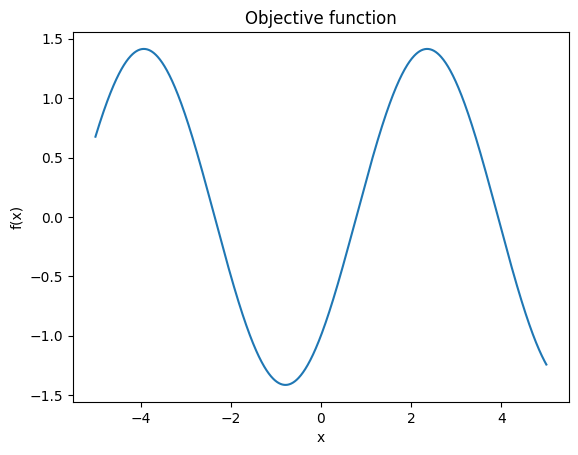

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def f(x):
  return np.sin(x) - np.cos(x)

# Calculate the function
y = f(x)
# Create a range of x values
x = np.linspace(-5, 5, 1000)

# Plot the objective function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective function')
plt.show()

## **2. Write a pseudo-code for your own algorithm**

1. Set Initial point x between $ -5 \le x \le 5 $
2. Set the step size(learning rate) ${\alpha}$
3. set the steepest direction $S_k$
4. Set the max number of iterations $N$
5. Set the convergence threshold $\epsilon$

```
Set parameters for gradient_descent() function
Define the function, f(x), to minimize
Define the differentiated function, df(x)
set the initial value of x
set learning rate alpha  
set maximum number of iterations N  
set convergence threshold epsilon

Define the gradient_descent
for i in range(N):
    start x with initial value of x
    set empty list to accumulate x values
    set empty list to accumulate y values 
    compute the gradient of the objective function at x  
    update x using new_x = x - alpha * gradient  
    compute the new value of the objective function at x  
    if the change in the objective function is less than epsilon, stop
    if the y value of new x is larger than x, stop
    else, 
      Append the x value to x values list
      Compute f(x) and append f(x) value to y values list
      change the x value into new x value and continue 
```


In [61]:
# Define f(x) and f'(x)
def f(x):
  return np.sin(x) - np.cos(x)

def df(x):
  return np.cos(x) + np.sin(x)

# Define gradient descent function
def gradient_descent(f, df, xi, alpha, N, epsilon = 1e-8):
  x = xi
  x_values = []
  y_values = []
  for i in range(N):
    x_new = x - alpha * df(x)
    # x should be in the range of -5 and 5 (Stopping criterion)
    if x_new < -5:
      x_new = -5
    elif x_new > 5:
      x_new = 5
    # Stopping Criterion: Conversion threshold
    if abs(f(x_new) - f(x)) < epsilon:
      break
    # Stopping Criterion
    if f(x_new) > f(x):
      break 
    x_values.append(x)
    y_values.append(f(x))
    x = x_new

  return x_values, y_values

## **3. Explain how you design a stopping criterion.**

* Stopping Criterion
  1. If the Gradient Descent point gets close to the minimum, the step size will be very small, but we want to stop if it makes very small movements that is not significant. Therefore, we put convergence threshold to determine if we continue or not when the gradient has changed less than certain number . 
  2. If the point of gradient descent gets close to the minimum, its y value will decrease. To stop the point at the minimum of the graph, we should stop the point movement before the f(x) value of updated x gets larger than that of x. Therefore, we put comparation of f(x) value of updated x and x to determine whether it continues or not.

## **4. Discuss with your teammates and answer the questions**

#### **Suppose that you implement a stopping criterion where the algorithm terminates when the number of iterations exceeds the maximum number of iterations. When the following conditions are given, what is the optimal solution? Do you think that it is a global optimum within the pre-determined range? If not, what is your strategy to improve the fidelity of the solution provided by the algorithm?**

  * Initial point $x$ = 3  
  * Step size = 0.05  
  * The maximum number of iterations = 500

x= 5, y= -1.2425864601263648


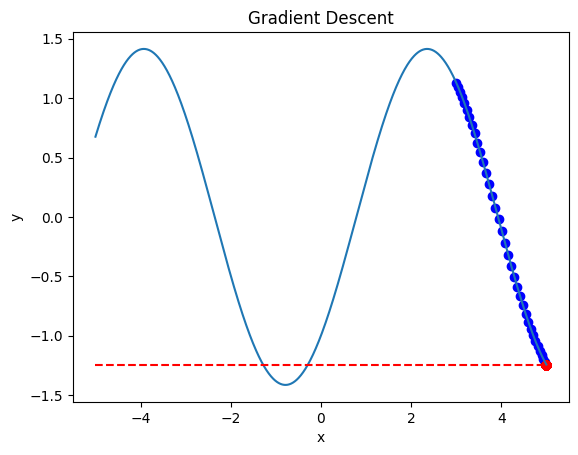

In [81]:
# Initial point
xi = 3
# The maximum number of iterations
N = 500
# Step size
alpha = 0.05

# Gradient_descent function with stopping critrion where the algorithm terminates when the number of iterations exceeds the maximum number of iterations.
def gradient_descent_1(f, df, xi, alpha, N, ):
  x = xi
  x_values = []
  y_values = []
  i=0
  for i in range(N):
    x_new = x - alpha * df(x)
    # x should be in the range of -5 and 5 (Stopping criterion)
    if x_new < -5:
      x_new = -5
    elif x_new > 5:
      x_new = 5
    x_values.append(x)
    y_values.append(f(x))
    x = x_new
    i += 1
  mini = y_values.index(min(y_values))
  print(f"x= {x_values[mini]}, y= {y_values[mini]}")
  return x_values, y_values, y_values[mini]

# Implement the gradient_descent function
x_coordinates,y_coordinates, mini_y = gradient_descent_1(f, df, xi, alpha, N)

# Plot a graph
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x))
for i in range(len(y_coordinates)):
  if y_coordinates[i] == min(y_coordinates):
    plt.scatter(x_coordinates[i], y_coordinates[i], c='red')
  else:
    plt.scatter(x_coordinates[i], y_coordinates[i], c='blue')
plt.hlines(mini_y, -5, 5, colors = "red", linestyle ='--')
plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

> The optimal solution was x= 5, y= -1.2425864601263648.  
We think it is not global optimum within the pre-determined range as you can see in the graph. I think changing the initial point before the concave($-4{\le}x{\le}-1$) can be feasible to find the global minimum. Because under given step size and iteration condition, the point can only move forward. Therefore, the minimum point should be infront of their moving path.

x= -0.785398166472164, y= -1.4142135623730951


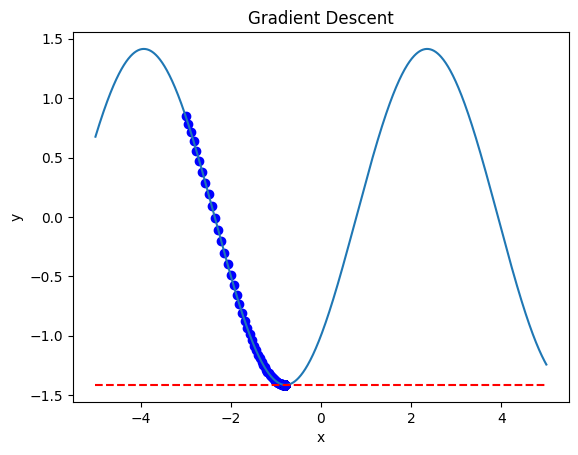

In [82]:
# Change the Initial point to -3
xi = -3
# The maximum number of iterations
N = 500
# Step size
alpha = 0.05

# Implement the gradient_descent function
x_coordinates,y_coordinates, mini_y = gradient_descent_1(f, df, xi, alpha, N)

# Plot a graph
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x))
for i in range(len(y_coordinates)):
  if y_coordinates[i] == min(y_coordinates):
    plt.scatter(x_coordinates[i], y_coordinates[i], c='red')
  else:
    plt.scatter(x_coordinates[i], y_coordinates[i], c='blue')
plt.hlines(mini_y, -5, 5, colors = "red", linestyle ='--')
plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### **Suppose that you implement a stopping criterion where the algorithm terminates when the number of iterations exceeds the maximum number of iterations. When the following conditions are given, do you think that the algorithm provides a global optimum within the pre-determined range? If not, what is your strategy to improve the fidelity of the solution provided by the algorithm? You could set up a different initial point; however, it is assumed that the initial point cannot be changed. You are only allowed to control either step size or the maximum number of iterations. Which option would like to choose? What is the reason why you end up choosing the option?**

* Initial point $x$ = 2
* Step size = 0.01
* The maximum number of iterations = 50

x= 1.6678785359803567, y= 1.0922210041948084


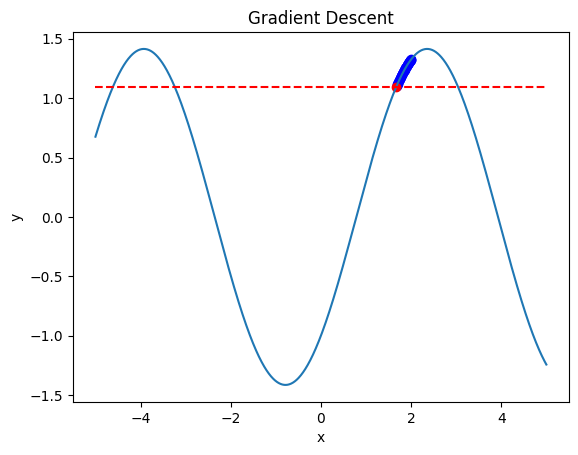

In [75]:
# Initial point
xi = 2
# The maximum number of iterations
N = 50
# Step size
alpha = 0.01

x_coordinates,y_coordinates, mini_y = gradient_descent_1(f, df, xi, alpha, N)

# Plot a graph
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x))
for i in range(len(y_coordinates)):
  if y_coordinates[i] == min(y_coordinates):
    plt.scatter(x_coordinates[i], y_coordinates[i], c='red')
  else:
    plt.scatter(x_coordinates[i], y_coordinates[i], c='blue')
plt.hlines(mini_y, -5, 5, colors = "red", linestyle ='--')
plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

> I think this algorithm does not give a global optimum within the pre-determined range.In this case, increasing the step size can be feasible if the initial point cannot be changed. If the maximum number of iterations gets larger, it will end up stopping at x = 5 again with increased execution time. To increase the exploration space, we should increase the step size. After several trials, I found out step size set at 1 could find the global optimum.

x= -0.7853981765303392, y= -1.414213562373095


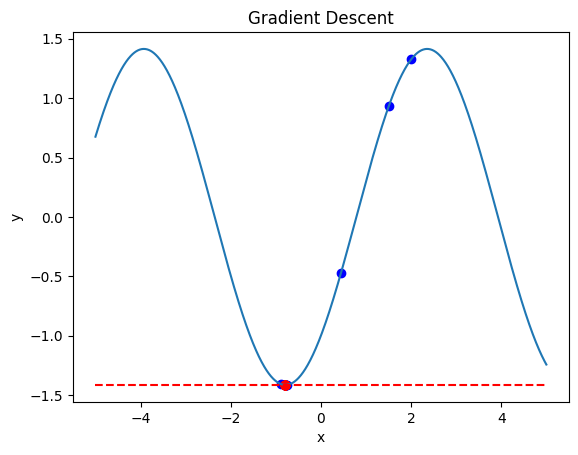

In [86]:
# Change the step size to 1
# Initial point
xi = 2
# The maximum number of iterations
N = 50
# Step size
alpha = 1

x_coordinates,y_coordinates, mini_y = gradient_descent_1(f, df, xi, alpha, N)

# Plot a graph
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x))
for i in range(len(y_coordinates)):
  if y_coordinates[i] == min(y_coordinates):
    plt.scatter(x_coordinates[i], y_coordinates[i], c='red')
  else:
    plt.scatter(x_coordinates[i], y_coordinates[i], c='blue')
plt.hlines(mini_y, -5, 5, colors = "red", linestyle ='--')
plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

##**Citations**

1. [Pseudocode, Plotting a graph of an observation function, gradient descent algorithm](https://chat.openai.com/chat)  
2. [Convergence threshold](https://stackoverflow.com/questions/17289082/gradient-descent-convergence-how-to-decide-convergence)  